In [12]:
import pandas as pd

df = pd.read_csv("fct_invoice.csv")
jsondf = pd.read_json('dim_customer.json')

In [13]:
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [14]:
jsondf.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


# Easy

In [15]:
#1. How many unique customers are in the dataset?

unique_customers = df['customer_id'].nunique()

print("Unique Customers: ", unique_customers)

Unique Customers:  5191


In [16]:
#2. What are the different categories of products available? How many unique categories are there?

unique_categories_list = df['category'].unique()
unique_categories_string = ", ".join(unique_categories_list)

print("Categories: ", unique_categories_string)

amount_unique_categories = df['category'].nunique()

print("Amount of Unique Categories: ", amount_unique_categories)

Categories:  Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
Amount of Unique Categories:  8


In [17]:
#3. Which payment method is the most popular? How many times was it used?

payment_counts = df['payment_method'].value_counts()

most_popular_payment = payment_counts.idxmax()
count = payment_counts.max()

print("Most Popular Payment Method:", most_popular_payment)
print("Number of Times Used:", count)

Most Popular Payment Method: Cash
Number of Times Used: 44447


# Medium

In [18]:
# 1. What are the three most popular categories, by total sales?

df['total_sales'] = df['quantity'] * df['price']


category_sales = df.groupby('category')['total_sales'].sum()

category_sales_sorted = category_sales.sort_values(ascending=False)

top_three_categories = category_sales_sorted.head(3)

top_three_categories_list = top_three_categories.index.tolist()


top_three_sums_list = top_three_categories.values.tolist()


counter = 1

for item in top_three_categories_list:
    
    print(counter, ":", item, "(", top_three_sums_list[counter-1], ")" )
    counter += 1

1 : Clothing ( 113996791.03999999 )
2 : Shoes ( 66553451.47 )
3 : Technology ( 57862350.0 )


In [19]:
# 2. What are the total sales attributed to customers over the age of 45?

jsondf.rename(columns={'id': 'customer_id'}, inplace=True)

merged_df = pd.merge(df, jsondf, on='customer_id')

filtered_df = merged_df[merged_df['age'] > 45]

total_sales_45 = filtered_df['total_sales'].sum()

print("Total Sales:", total_sales_45)

Total Sales: 82039768.15


In [20]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?


import matplotlib.pyplot as plt

dfduplicate = df.copy()

dfduplicate['invoice_date'] = pd.to_datetime(dfduplicate['invoice_date'])

# Extract month and year into separate columns
dfduplicate['month'] = dfduplicate['invoice_date'].dt.month
dfduplicate['year'] = dfduplicate['invoice_date'].dt.year

C:\Users\Miguel Baquiran\AppData\Local\Temp\ipykernel_16956\1759262258.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfduplicate['invoice_date'] = pd.to_datetime(dfduplicate['invoice_date'])


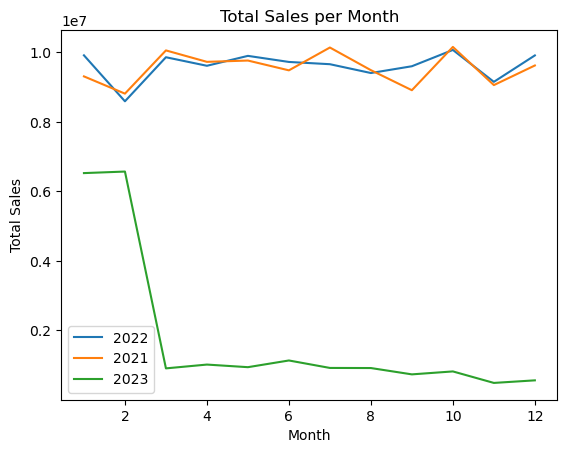

In [21]:
monthly_sales = dfduplicate.groupby(['year', 'month'])['total_sales'].sum()

# Create a separate line plot for each year
for year in dfduplicate['year'].unique():
    sales_year = monthly_sales[year]  # Filter data for the current year
    plt.plot(sales_year.index.get_level_values('month'), sales_year.values, label=year)

# Set plot title and labels
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Add a legend to distinguish the lines by year
plt.legend()

# Display the plot
plt.show()


# Hard

In [22]:
# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).


merged_df_duplicate = merged_df.copy()

age_ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90]

merged_df_duplicate['Age Range'] = pd.cut(merged_df_duplicate['age'], bins=age_ranges, labels=[f"{r}-{r+9}" for r in age_ranges[:-1]])

pivot_table = pd.pivot_table(merged_df_duplicate, values='total_sales', index='category', columns='Age Range', aggfunc='sum')

pivot_table

Age Range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95
Clothing,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04
Cosmetics,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80
Food & Beverage,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12
Shoes,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97
Souvenir,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25
Technology,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00
Toys,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00
